In [1]:
import sqlite3
import pandas as pd
conn=sqlite3.connect('sqlite_db_pythonsqlite.db')
cur = conn.cursor()

In [2]:
qry="select * from sqlite_master"
pd.read_sql(qry,conn)


,type,name,tbl_name,rootpage,sql
0,table,Bookings,Bookings,2,"CREATE TABLE ""Bookings"" (\n ""bookid"" int(4) N..."
1,index,sqlite_autoindex_Bookings_1,Bookings,3,None
2,table,Facilities,Facilities,50,"CREATE TABLE ""Facilities"" (\n ""facid"" int(1) ..."
3,index,sqlite_autoindex_Facilities_1,Facilities,51,None
4,table,Members,Members,52,"CREATE TABLE ""Members"" (\n ""memid"" int(2) NOT..."
5,index,sqlite_autoindex_Members_1,Members,53,None


In [3]:
#
df = pd.read_sql_query("SELECT * FROM Bookings ", conn)

# Print head of DataFrame
print(df.head(10))


   bookid  facid  memid            starttime  slots
0       0      3      1  2012-07-03 11:00:00      2
1       1      4      1  2012-07-03 08:00:00      2
2       2      6      0  2012-07-03 18:00:00      2
3       3      7      1  2012-07-03 19:00:00      2
4       4      8      1  2012-07-03 10:00:00      1
5       5      8      1  2012-07-03 15:00:00      1
6       6      0      2  2012-07-04 09:00:00      3
7       7      0      2  2012-07-04 15:00:00      3
8       8      4      3  2012-07-04 13:30:00      2
9       9      4      0  2012-07-04 15:00:00      2


In [4]:
sum(df.slots)


9191

### Checking count of booking instances for members only by facility id 

In [5]:
queryx='''
select f.facid,count(b.facid) as counts from Bookings as b  inner join Facilities as f on b.facid=f.facid 
where b.memid!=0 
group by f.facid
'''
df1=pd.read_sql_query(queryx,conn)
print(df1)

   facid  counts
0      0     308
1      1     276
2      2     344
3      3     385
4      4     421
5      5      27
6      6     195
7      7     421
8      8     783


In [6]:
print('count of booking instances for members only:',sum(df1.counts))

count of booking instances for members only: 3160


In [7]:
df2 = pd.read_sql_query("SELECT * FROM Facilities ", conn)
# Print head of DataFrame
print(df2.head())


   facid             name  membercost  guestcost  initialoutlay  \
0      0   Tennis Court 1         5.0       25.0          10000   
1      1   Tennis Court 2         5.0       25.0           8000   
2      2  Badminton Court         0.0       15.5           4000   
3      3     Table Tennis         0.0        5.0            320   
4      4   Massage Room 1         9.9       80.0           4000   

   monthlymaintenance  
0                 200  
1                 200  
2                  50  
3                  10  
4                3000  


In [8]:
df3 = pd.read_sql_query("select * from Members ", conn)
# Print head of DataFrame
print(df3.head())


   memid   surname firstname                       address  zipcode  \
0      0     GUEST     GUEST                         GUEST        0   
1      1     Smith    Darren    8 Bloomsbury Close, Boston     4321   
2      2     Smith     Tracy  8 Bloomsbury Close, New York     4321   
3      3    Rownam       Tim        23 Highway Way, Boston    23423   
4      4  Joplette    Janice    20 Crossing Road, New York      234   

        telephone recommendedby             joindate  
0  (000) 000-0000                2012-07-01 00:00:00  
1    555-555-5555                2012-07-02 12:02:05  
2    555-555-5555                2012-07-02 12:08:23  
3  (844) 693-0723                2012-07-03 09:32:15  
4  (833) 942-4710             1  2012-07-03 10:25:05  



### /* Q10: Produce a list of facilities with a total revenue less than 1000.
### The output of facility name and total revenue, sorted by revenue. Remember
### that there's a different cost for guests and members! */


In [9]:
q='''
SELECT query.facility,SUM(cost) as revenue
FROM (SELECT f.name AS facility,
        CASE WHEN b.memid=0 THEN f.guestcost* b.slots ELSE f.membercost* b.slots END AS cost
FROM Bookings AS b INNER JOIN Facilities AS f ON b.facid=f.facid) AS query
GROUP BY query.facility
HAVING revenue<1000
ORDER BY revenue
'''
pd.read_sql_query(q,conn)


,facility,revenue
0,Table Tennis,180
1,Snooker Table,240
2,Pool Table,270



### /* Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order */



In [10]:
q1='''
select m.firstname || ',' || m.surname as member,q.firstname || ',' || q.surname as recommender
from Members as m inner join Members as q on q.memid=m.recommendedby
where q.memid!=0 and q.recommendedby is not null
order by q.surname,q.firstname

'''
pd.read_sql_query(q1,conn)

,member,recommender
0,"Ramnaresh,Sarwin","Florence,Bader"
1,"Joan,Coplin","Timothy,Baker"
2,"Matthew,Genting","Gerald,Butters"
3,"Timothy,Baker","Jemima,Farrell"
4,"David,Pinker","Jemima,Farrell"
5,"Henrietta,Rumney","Matthew,Genting"
6,"Douglas,Jones","David,Jones"
7,"Nancy,Dare","Janice,Joplette"
8,"David,Jones","Janice,Joplette"
9,"John,Hunt","Millicent,Purview"



### /* Q12: Find the facilities with their usage by member, but not guests */


In [11]:
q2='''
select f.name as facility,sum(slots) as usage
from Bookings as b inner join Facilities as f on b.facid=f.facid
where b.memid !=0
group by facility
order by usage
'''
pd.read_sql_query(q2,conn)

,facility,usage
0,Massage Room 2,54
1,Squash Court,418
2,Table Tennis,794
3,Pool Table,856
4,Snooker Table,860
5,Tennis Court 2,882
6,Massage Room 1,884
7,Tennis Court 1,957
8,Badminton Court,1086



### /* Q13: Find the facilities usage by month, but not guests */


#### Scenariao 1 - Assuming facility usage means number of slots booked by members as total usage

In [12]:
q3='''
select f.name as facility,strftime('%m',b.starttime) as month,sum(b.slots) as usage
from Bookings as b  inner join Facilities as f on b.facid=f.facid
where b.memid!=0
group by facility,month
order by facility,month
'''
pd.read_sql_query(q3,conn)

,facility,month,usage
0,Badminton Court,07,165
1,Badminton Court,08,414
2,Badminton Court,09,507
3,Massage Room 1,07,166
4,Massage Room 1,08,316
5,Massage Room 1,09,402
6,Massage Room 2,07,8
7,Massage Room 2,08,18
8,Massage Room 2,09,28
9,Pool Table,07,110


### Q.13 Scenario-2 Instead of slots used by members we want to know number of times members booked facilities ( excluding guests)

####  Approach 1- Grouping by only month only( Not the facility)
####  May  be incorrect as it will select only first 3 facilities and count by month ( counting  all facilities used in a particular month, rather than counting individual facilities)

In [13]:
q4 = '''SELECT 
                name,
                strftime('%m', starttime) AS use_month,
                COUNT(name) AS member_use_count
            FROM Bookings AS b
            LEFT JOIN Facilities AS f
                USING(facid)
            WHERE b.memid > 0
            GROUP BY use_month'''

df4 = pd.read_sql_query(q4, conn)
df4.head(10)


,name,use_month,member_use_count
0,Table Tennis,07,480
1,Tennis Court 1,08,1168
2,Tennis Court 1,09,1512


In [14]:
sum(df4.member_use_count)

3160

#### Approach 2- Grouping by both  month and facilities only.
#### still excluding guests booking and counting all facilities used by members for each individual bookings not considering slots


In [15]:
q5 = '''SELECT 
                name,
                strftime('%m', starttime) AS use_month,
                COUNT(name) AS member_use_count
            FROM Bookings AS b
            INNER JOIN Facilities AS f
                USING(facid)
            WHERE b.memid > 0
            GROUP BY use_month,name
            order by use_month,name'''

df5=pd.read_sql_query(q5, conn)
print(df5)



               name use_month  member_use_count
0   Badminton Court        07                51
1    Massage Room 1        07                77
2    Massage Room 2        07                 4
3        Pool Table        07               103
4     Snooker Table        07                68
5      Squash Court        07                23
6      Table Tennis        07                48
7    Tennis Court 1        07                65
8    Tennis Court 2        07                41
9   Badminton Court        08               132
10   Massage Room 1        08               153
11   Massage Room 2        08                 9
12       Pool Table        08               272
13    Snooker Table        08               154
14     Squash Court        08                85
15     Table Tennis        08               143
16   Tennis Court 1        08               111
17   Tennis Court 2        08               109
18  Badminton Court        09               161
19   Massage Room 1        09           

In [16]:
sum(df5.member_use_count)

3160

####  Since total count is same in both cases (approach 1 and 2) at 3160, approach 2 is more likely to be correct as it is showing all facilites usage unlike approach 1 which is only showing 3 facilities

<b> Q8: Produce a list of bookings on the day of 2012-09-14 which will cost the member (or guest) more than  $30. Remember that guests have
different costs to members (the listed costs are per half-hour 'slot'), and
the guest user's ID is always 0. Include in your output the name of the
facility, the name of the member formatted as a single column, and the cost.
Order by descending cost, and do not use any subqueries. */ <b>


####  Output of question 8 in PHP My Admin
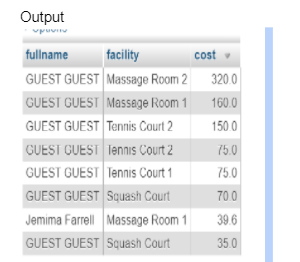

### /* Q9: This time, produce the same result as in Q8, but using a subquery. */


In [17]:
q6='''
select distinct s.facilityname,s.first || ',' || s.lastname as fullname,s.cost
    from(select f.name as facilityname,m.surname as lastname,m.firstname as first,case when b.memid!=0 then b.slots*f.membercost else b.slots*f.guestcost end as cost
        from Bookings as b inner join Facilities as f on b.facid=f.facid inner join Members as m on b.memid=m.memid
        where starttime like '2012-09-14%'
        and (case when b.memid!=0 then b.slots*f.membercost else b.slots*f.guestcost end)>30) as s
    order by cost desc
'''
pd.read_sql_query(q6, conn)
        
    


,facilityname,fullname,cost
0,Massage Room 2,"GUEST,GUEST",320.0
1,Massage Room 1,"GUEST,GUEST",160.0
2,Tennis Court 2,"GUEST,GUEST",150.0
3,Tennis Court 1,"GUEST,GUEST",75.0
4,Tennis Court 2,"GUEST,GUEST",75.0
5,Squash Court,"GUEST,GUEST",70.0
6,Massage Room 1,"Jemima,Farrell",39.6
7,Squash Court,"GUEST,GUEST",35.0
